**Your challenge can be found toward the end of this notebook. The code below will be needed in order to begin the challenge. Read through and execute all necessary portions of this code to complete the tasks for this challenge.**

##### Import the necessary packages

In [3]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures
import graphviz #to visualize decision trees

##### Cleaning the Dataset

In [5]:
df_orig = pd.read_excel('default_of_credit_card_clients.xls')
df_orig

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE PAY_1  PAY_2  \
0      798fc410-45c1      20000    2          2         1   24     2      2   
1      8a8c8f3b-8eb4     120000    2          2         2   26    -1      2   
2      85698822-43f5      90000    2          2         2   34     0      0   
3      0737c11b-be42      50000    2          2         1   37     0      0   
4      3b7f77cc-dbc0      50000    1          2         1   57    -1      0   
...              ...        ...  ...        ...       ...  ...   ...    ...   
29995  ecff42d0-bdc6     220000    1          3         1   39     0      0   
29996  99d1fa0e-222b     150000    1          3         2   43    -1     -1   
29997  95cdd3e7-4f24      30000    1          2         2   37     4      3   
29998  00d03f02-04cd      80000    1          3         1   41     1     -1   
29999  15d69f9f-5ad3      50000    1          2         1   46     0      0   

       PAY_3  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1     -1  ...          0          0          0         0       689   
1          0      0  ...       3272       3455       3261         0      1000   
2          0      0  ...      14331      14948      15549      1518      1500   
3          0      0  ...      28314      28959      29547      2000      2019   
4         -1      0  ...      20940      19146      19131      2000     36681   
...      ...    ...  ...        ...        ...        ...       ...       ...   
29995      0      0  ...      88004      31237      15980      8500     20000   
29996     -1     -1  ...       8979       5190          0      1837      3526   
29997      2     -1  ...      20878      20582      19357         0         0   
29998      0      0  ...      52774      11855      48944     85900      3409   
29999      0      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0             0         0         0         0                           1  
1          1000      1000         0      2000                           1  
2          1000      1000      1000      5000                           0  
3          1200      1100      1069      1000                           0  
4         10000      9000       689       679                           0  
...         ...       ...       ...       ...                         ...  
29995      5003      3047      5000      1000                           0  
29996      8998       129         0         0                           0  
29997     22000      4200      2000      3100                           1  
29998      1178      1926     52964      1804                           1  
29999      1430      1000      1000      1000                           1  

[30000 rows x 25 columns]

In [6]:
df_zero_mask = df_orig == 0
df_zero_mask

ID  LIMIT_BAL    SEX  EDUCATION  MARRIAGE    AGE  PAY_1  PAY_2  \
0      False      False  False      False     False  False  False  False   
1      False      False  False      False     False  False  False  False   
2      False      False  False      False     False  False   True   True   
3      False      False  False      False     False  False   True   True   
4      False      False  False      False     False  False  False   True   
...      ...        ...    ...        ...       ...    ...    ...    ...   
29995  False      False  False      False     False  False   True   True   
29996  False      False  False      False     False  False  False  False   
29997  False      False  False      False     False  False  False  False   
29998  False      False  False      False     False  False  False  False   
29999  False      False  False      False     False  False   True   True   

       PAY_3  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0      False  False  ...       True       True       True      True     False   
1       True   True  ...      False      False      False      True     False   
2       True   True  ...      False      False      False     False     False   
3       True   True  ...      False      False      False     False     False   
4      False   True  ...      False      False      False     False     False   
...      ...    ...  ...        ...        ...        ...       ...       ...   
29995   True   True  ...      False      False      False     False     False   
29996  False  False  ...      False      False       True     False     False   
29997  False  False  ...      False      False      False      True      True   
29998   True   True  ...      False      False      False     False     False   
29999   True   True  ...      False      False      False     False     False   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0          True      True      True      True                       False  
1         False     False      True     False                       False  
2         False     False     False     False                        True  
3         False     False     False     False                        True  
4         False     False     False     False                        True  
...         ...       ...       ...       ...                         ...  
29995     False     False     False     False                        True  
29996     False     False      True      True                        True  
29997     False     False     False     False                       False  
29998     False     False     False     False                       False  
29999     False     False     False     False                       False  

[30000 rows x 25 columns]

In [7]:
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)
feature_zero_mask 

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Length: 30000, dtype: bool

In [8]:
sum(feature_zero_mask)
# 315

315

Remove all the rows with all zero features and response, confirm this that gets rid of the duplicate IDs.

In [9]:
df_clean = df_orig.loc[~feature_zero_mask,:].copy()
df_clean

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE PAY_1  PAY_2  \
0      798fc410-45c1      20000    2          2         1   24     2      2   
1      8a8c8f3b-8eb4     120000    2          2         2   26    -1      2   
2      85698822-43f5      90000    2          2         2   34     0      0   
3      0737c11b-be42      50000    2          2         1   37     0      0   
4      3b7f77cc-dbc0      50000    1          2         1   57    -1      0   
...              ...        ...  ...        ...       ...  ...   ...    ...   
29995  ecff42d0-bdc6     220000    1          3         1   39     0      0   
29996  99d1fa0e-222b     150000    1          3         2   43    -1     -1   
29997  95cdd3e7-4f24      30000    1          2         2   37     4      3   
29998  00d03f02-04cd      80000    1          3         1   41     1     -1   
29999  15d69f9f-5ad3      50000    1          2         1   46     0      0   

       PAY_3  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1     -1  ...          0          0          0         0       689   
1          0      0  ...       3272       3455       3261         0      1000   
2          0      0  ...      14331      14948      15549      1518      1500   
3          0      0  ...      28314      28959      29547      2000      2019   
4         -1      0  ...      20940      19146      19131      2000     36681   
...      ...    ...  ...        ...        ...        ...       ...       ...   
29995      0      0  ...      88004      31237      15980      8500     20000   
29996     -1     -1  ...       8979       5190          0      1837      3526   
29997      2     -1  ...      20878      20582      19357         0         0   
29998      0      0  ...      52774      11855      48944     85900      3409   
29999      0      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0             0         0         0         0                           1  
1          1000      1000         0      2000                           1  
2          1000      1000      1000      5000                           0  
3          1200      1100      1069      1000                           0  
4         10000      9000       689       679                           0  
...         ...       ...       ...       ...                         ...  
29995      5003      3047      5000      1000                           0  
29996      8998       129         0         0                           0  
29997     22000      4200      2000      3100                           1  
29998      1178      1926     52964      1804                           1  
29999      1430      1000      1000      1000                           1  

[29685 rows x 25 columns]

In [10]:
df_clean.shape
# (29685, 25)

(29685, 25)

In [11]:
df_clean['ID'].nunique()
# 29685

29685

Clean up the `EDUCATION` and `MARRIAGE` features as in Chapter 1

In [12]:
df_clean['EDUCATION'].value_counts()
# 2    13884
# 1    10474
# 3     4867
# 5      275
# 4      122
# 6       49
# 0       14
# Name: EDUCATION, dtype: int64

2    13884
1    10474
3     4867
5      275
4      122
6       49
0       14
Name: EDUCATION, dtype: int64

"Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)"

Assign unknown categories to other.

In [13]:
df_clean['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)

In [14]:
df_clean['EDUCATION'].value_counts()
# 2    13884
# 1    10474
# 3     4867
# 4      460
# Name: EDUCATION, dtype: int64

2    13884
1    10474
3     4867
4      460
Name: EDUCATION, dtype: int64

Examine and clean marriage feature as well:

In [15]:
df_clean['MARRIAGE'].value_counts()
# 2    15810
# 1    13503
# 3      318
# 0       54
# Name: MARRIAGE, dtype: int64

2    15810
1    13503
3      318
0       54
Name: MARRIAGE, dtype: int64

In [16]:
#Should only be (1 = married; 2 = single; 3 = others).
df_clean['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)

In [17]:
df_clean['MARRIAGE'].value_counts()
# 2    15810
# 1    13503
# 3      372
# Name: MARRIAGE, dtype: int64

2    15810
1    13503
3      372
Name: MARRIAGE, dtype: int64

Now instead of removing rows with `PAY_1` = 'Not available', as done in Chapter 1, here select these out for addition to training and testing splits.

In [18]:
df_clean['PAY_1'].value_counts()
# 0                13087
# -1                5047
# 1                 3261
# Not available     3021
# -2                2476
# 2                 2378
# 3                  292
# 4                   63
# 5                   23
# 8                   17
# 6                   11
# 7                    9
# Name: PAY_1, dtype: int64

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

In [19]:
missing_pay_1_mask = df_clean['PAY_1'] == 'Not available'
missing_pay_1_mask

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Name: PAY_1, Length: 29685, dtype: bool

In [20]:
sum(missing_pay_1_mask)
# 3021

3021

In [21]:
df_missing_pay_1 = df_clean.loc[missing_pay_1_mask,:].copy()
df_missing_pay_1

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE          PAY_1  \
17     f0ba5e02-0c0f     320000    1          1         1   49  Not available   
28     aecb449b-a999      50000    2          3         1   47  Not available   
29     57ea9a1f-cdd5      50000    1          1         2   26  Not available   
54     781f3cc2-7ddc     150000    2          1         2   29  Not available   
60     5c00d7e6-a804     500000    2          3         1   28  Not available   
...              ...        ...  ...        ...       ...  ...            ...   
29949  4b490335-91ab     280000    1          1         1   39  Not available   
29956  b4a99d86-3bdd     150000    1          1         2   30  Not available   
29967  f411fbb3-adaf      50000    1          2         1   32  Not available   
29973  31c0c152-e5ac     230000    1          2         1   35  Not available   
29984  3aee2b22-6bd0      30000    1          2         2   38  Not available   

       PAY_2  PAY_3  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
17         0      0     -1  ...      70074       5856     195599     10358   
28        -1     -1     -1  ...       2040      30430        257      3415   
29         0      0      0  ...      17907      18375      11400      1500   
54         0      0      0  ...      26518      21042      16540      1600   
60         0      0      0  ...      14937      13827      15571      1516   
...      ...    ...    ...  ...        ...        ...        ...       ...   
29949      0      0      0  ...      40939      44290      70573      1652   
29956      0      0     -1  ...       1610       1180       2980      2000   
29967      0      0     -1  ...      50551      40590      39384      2686   
29973     -2     -2     -2  ...          0          0          0         0   
29984     -1     -2     -1  ...       1993       1907       3319       923   

       PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
17        10000     75940     20000    195599     50000   
28         3421      2044     30430       257         0   
29         1500      1000      1000      1600         0   
54         1718      1049      1500      2000      5000   
60         1300      1000      1000      2000      2000   
...         ...       ...       ...       ...       ...   
29949      2144      1666      5015     32013        12   
29956      2000      2000      1000      3000         0   
29967         0     50551         0      1600      1500   
29973         0         0         0         0         0   
29984      2977      1999      3057      3319      1000   

       default payment next month  
17                              0  
28                              0  
29                              0  
54                              0  
60                              1  
...                           ...  
29949                           0  
29956                           0  
29967                           0  
29973                           1  
29984                           0  

[3021 rows x 25 columns]

In [22]:
df_missing_pay_1.shape
# (3021, 25)

(3021, 25)

In [23]:
df_missing_pay_1['PAY_1'].head(3)

17    Not available
28    Not available
29    Not available
Name: PAY_1, dtype: object

In [24]:
df_missing_pay_1['PAY_1'].value_counts()

Not available    3021
Name: PAY_1, dtype: int64

In [25]:
df_missing_pay_1.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

Load cleaned data

In [26]:
df = pd.read_csv('cleaned_data.csv')
df

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  \
0      798fc410-45c1      20000    2          2         1   24      2      2   
1      8a8c8f3b-8eb4     120000    2          2         2   26     -1      2   
2      85698822-43f5      90000    2          2         2   34      0      0   
3      0737c11b-be42      50000    2          2         1   37      0      0   
4      3b7f77cc-dbc0      50000    1          2         1   57     -1      0   
...              ...        ...  ...        ...       ...  ...    ...    ...   
26659  ecff42d0-bdc6     220000    1          3         1   39      0      0   
26660  99d1fa0e-222b     150000    1          3         2   43     -1     -1   
26661  95cdd3e7-4f24      30000    1          2         2   37      4      3   
26662  00d03f02-04cd      80000    1          3         1   41      1     -1   
26663  15d69f9f-5ad3      50000    1          2         1   46      0      0   

       PAY_3  PAY_4  ...  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0         -1     -1  ...         0         0         0         0   
1          0      0  ...      1000      1000         0      2000   
2          0      0  ...      1000      1000      1000      5000   
3          0      0  ...      1200      1100      1069      1000   
4         -1      0  ...     10000      9000       689       679   
...      ...    ...  ...       ...       ...       ...       ...   
26659      0      0  ...      5003      3047      5000      1000   
26660     -1     -1  ...      8998       129         0         0   
26661      2     -1  ...     22000      4200      2000      3100   
26662      0      0  ...      1178      1926     52964      1804   
26663      0      0  ...      1430      1000      1000      1000   

       default payment next month  EDUCATION_CAT  graduate school  \
0                               1     university                0   
1                               1     university                0   
2                               0     university                0   
3                               0     university                0   
4                               0     university                0   
...                           ...            ...              ...   
26659                           0    high school                0   
26660                           0    high school                0   
26661                           1     university                0   
26662                           1    high school                0   
26663                           1     university                0   

       high school  others  university  
0                0       0           1  
1                0       0           1  
2                0       0           1  
3                0       0           1  
4                0       0           1  
...            ...     ...         ...  
26659            1       0           0  
26660            1       0           0  
26661            0       0           1  
26662            1       0           0  
26663            0       0           1  

[26664 rows x 30 columns]

In [27]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [28]:
features_response = df.columns.tolist()
features_response

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month',
 'EDUCATION_CAT',
 'graduate school',
 'high school',
 'others',
 'university']

In [29]:
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']

In [30]:
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

##### Mode and Random Imputation of `PAY_1`

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = \
train_test_split(df[features_response[:-1]].values, df['default payment next month'].values,
test_size=0.2, random_state=24)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
# (21331, 17)
# (5333, 17)
# (21331,)
# (5333,)

(21331, 17)
(5333, 17)
(21331,)
(5333,)


In [34]:
df_missing_pay_1.shape

(3021, 25)

In [35]:
features_response[4]

'PAY_1'

In [36]:
np.median(X_train[:,4])

0.0

In [37]:
np.random.seed(seed=1)
fill_values = [0, np.random.choice(X_train[:,4], size=(3021,), replace=True)]

In [38]:
fill_strategy = ['mode', 'random']

In [39]:
fill_values[-1]

array([ 0,  0,  0, ...,  2,  0, -2], dtype=int64)

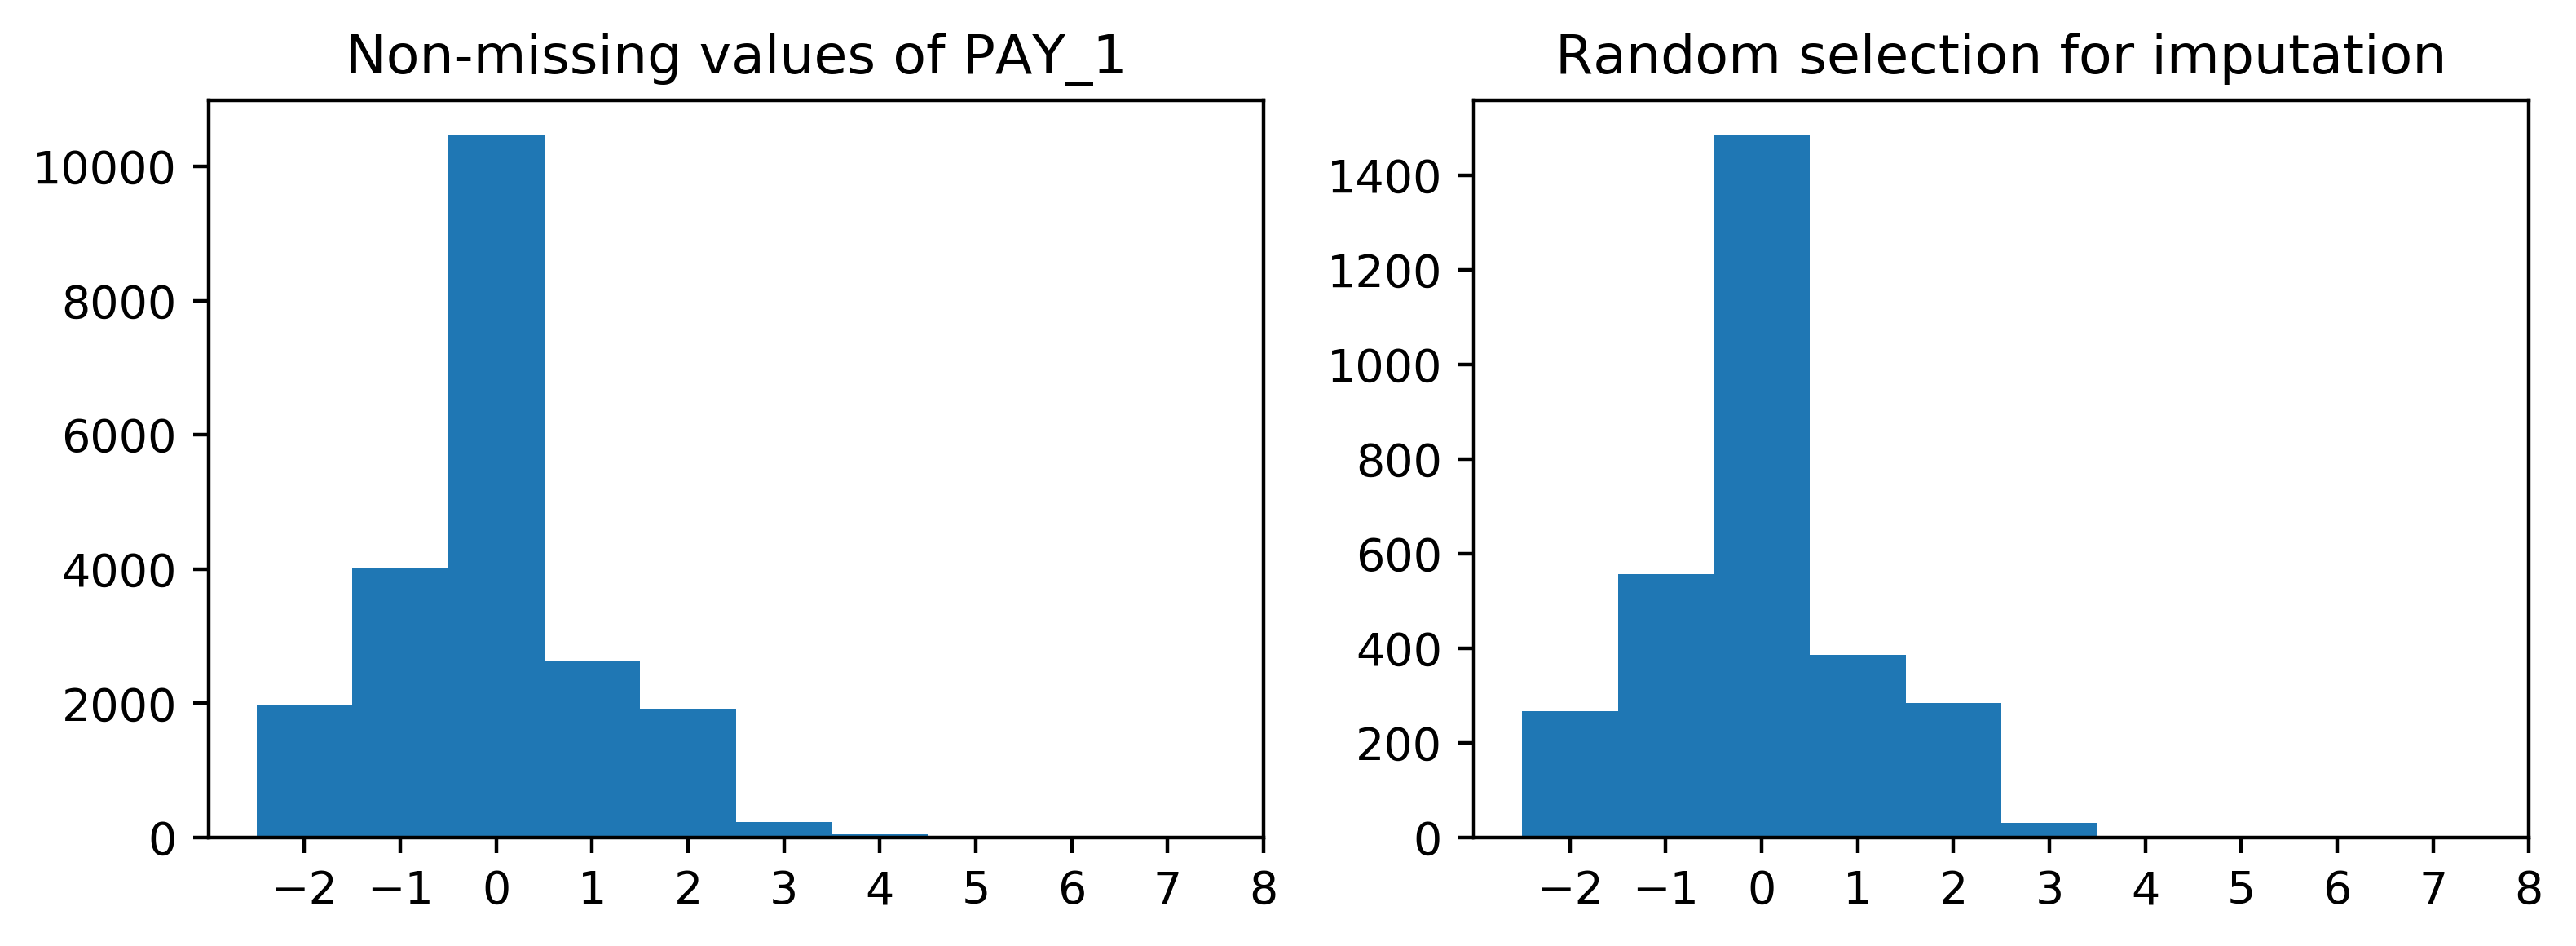

In [40]:
fig, axs = plt.subplots(1,2, figsize=(8,3))
bin_edges = np.arange(-2,9)
axs[0].hist(X_train[:,4], bins=bin_edges, align='left')
axs[0].set_xticks(bin_edges)
axs[0].set_title('Non-missing values of PAY_1')
axs[1].hist(fill_values[-1], bins=bin_edges, align='left')
axs[1].set_xticks(bin_edges)
axs[1].set_title('Random selection for imputation')
plt.tight_layout()

To do cross-validation on the training set, now we need to shuffle since all the samples with missing `PAY_1` were concatenated on to the end.

In [41]:
from sklearn.model_selection import KFold

In [42]:
k_folds = KFold(n_splits=4, shuffle=True, random_state=1)

Don't need to do a grid search, so we can use `cross_validate`

In [43]:
from sklearn.model_selection import cross_validate

For the estimator, set the optimal hyperparameters determined in previous chapter.

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf = RandomForestClassifier\
(n_estimators=200, criterion='gini', max_depth=9,
min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
random_state=4, verbose=1, warm_start=False, class_weight=None)

In [46]:
for counter in range(len(fill_values)):
    #Copy the data frame with missing PAY_1 and assign imputed values
    df_fill_pay_1_filled = df_missing_pay_1.copy()
    df_fill_pay_1_filled['PAY_1'] = fill_values[counter]
    
    #Split imputed data in to training and testing, using the same
    #80/20 split we have used for the data with non-missing PAY_1
    X_fill_pay_1_train, X_fill_pay_1_test, y_fill_pay_1_train, y_fill_pay_1_test = \
    train_test_split(
        df_fill_pay_1_filled[features_response[:-1]].values,
        df_fill_pay_1_filled['default payment next month'].values,
    test_size=0.2, random_state=24)
    
    #Concatenate the imputed data with the array of non-missing data
    X_train_all = np.concatenate((X_train, X_fill_pay_1_train), axis=0)
    y_train_all = np.concatenate((y_train, y_fill_pay_1_train), axis=0)
    
    #Use the KFolds splitter and the random forest model to get
    #4-fold cross-validation scores for both imputation methods
    imputation_compare_cv = cross_validate(rf, X_train_all, y_train_all, scoring='roc_auc',
                                       cv=k_folds, n_jobs=-1, verbose=1,
                                       return_train_score=True, return_estimator=True,
                                       error_score='raise-deprecating')
    
    test_score = imputation_compare_cv['test_score']
    print(fill_strategy[counter] + ' imputation: ' +
          'mean testing score ' + str(np.mean(test_score)) +
          ', std ' + str(np.std(test_score)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   15.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   15.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


mode imputation: mean testing score 0.772866246168149, std 0.0031479941297533737
random imputation: mean testing score 0.7692540439833129, std 0.003660875187678248


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   15.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   15.8s finished


##### A Predictive Model for `PAY_1`

In [47]:
pay_1_df = df.copy()
pay_1_df

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  \
0      798fc410-45c1      20000    2          2         1   24      2      2   
1      8a8c8f3b-8eb4     120000    2          2         2   26     -1      2   
2      85698822-43f5      90000    2          2         2   34      0      0   
3      0737c11b-be42      50000    2          2         1   37      0      0   
4      3b7f77cc-dbc0      50000    1          2         1   57     -1      0   
...              ...        ...  ...        ...       ...  ...    ...    ...   
26659  ecff42d0-bdc6     220000    1          3         1   39      0      0   
26660  99d1fa0e-222b     150000    1          3         2   43     -1     -1   
26661  95cdd3e7-4f24      30000    1          2         2   37      4      3   
26662  00d03f02-04cd      80000    1          3         1   41      1     -1   
26663  15d69f9f-5ad3      50000    1          2         1   46      0      0   

       PAY_3  PAY_4  ...  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0         -1     -1  ...         0         0         0         0   
1          0      0  ...      1000      1000         0      2000   
2          0      0  ...      1000      1000      1000      5000   
3          0      0  ...      1200      1100      1069      1000   
4         -1      0  ...     10000      9000       689       679   
...      ...    ...  ...       ...       ...       ...       ...   
26659      0      0  ...      5003      3047      5000      1000   
26660     -1     -1  ...      8998       129         0         0   
26661      2     -1  ...     22000      4200      2000      3100   
26662      0      0  ...      1178      1926     52964      1804   
26663      0      0  ...      1430      1000      1000      1000   

       default payment next month  EDUCATION_CAT  graduate school  \
0                               1     university                0   
1                               1     university                0   
2                               0     university                0   
3                               0     university                0   
4                               0     university                0   
...                           ...            ...              ...   
26659                           0    high school                0   
26660                           0    high school                0   
26661                           1     university                0   
26662                           1    high school                0   
26663                           1     university                0   

       high school  others  university  
0                0       0           1  
1                0       0           1  
2                0       0           1  
3                0       0           1  
4                0       0           1  
...            ...     ...         ...  
26659            1       0           0  
26660            1       0           0  
26661            0       0           1  
26662            1       0           0  
26663            0       0           1  

[26664 rows x 30 columns]

In [48]:
features_for_imputation = pay_1_df.columns.tolist()
features_for_imputation

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month',
 'EDUCATION_CAT',
 'graduate school',
 'high school',
 'others',
 'university']

In [49]:
items_to_remove_2 = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university', 'default payment next month', 'PAY_1']

In [50]:
features_for_imputation = [item for item in features_for_imputation if item not in items_to_remove_2]
features_for_imputation

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

##### Building a Multiclass Classification Model for Imputation

In [51]:
X_impute_train, X_impute_test, y_impute_train, y_impute_test = \
train_test_split(
    pay_1_df[features_for_imputation].values,
    pay_1_df['PAY_1'].values,
test_size=0.2, random_state=24)

In [52]:
rf_impute_params = {'max_depth':[3, 6, 9, 12],
             'n_estimators':[10, 50, 100, 200]}

In [53]:
from sklearn.model_selection import GridSearchCV

Need to use accuracy here as ROC AUC is not supported for multiclass. Need to use multiclass and not regression because need to limit to integer values of `PAY_1`.

In [54]:
cv_rf_impute = GridSearchCV(rf, param_grid=rf_impute_params, scoring='accuracy',
                            n_jobs=-1, iid=False, refit=True,
                            cv=4, verbose=2, error_score=np.nan, return_train_score=True)

In [55]:
cv_rf_impute.fit(X_impute_train, y_impute_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:  1.2min finished
C:\Users\Mrinal\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   20.8s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=9,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=200, n_jobs=None,
                                              oob_score=False, random_state=4,
                                      

In [56]:
impute_df = pd.DataFrame(cv_rf_impute.cv_results_)
impute_df

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.342626      0.048555         0.021299        0.004013   
1        1.821114      0.033569         0.085604        0.006974   
2        3.968436      0.088339         0.221054        0.026959   
3        8.048026      0.202578         0.335950        0.026548   
4        0.689802      0.013109         0.028929        0.011356   
5        3.495470      0.045100         0.106343        0.014742   
6        6.928644      0.189181         0.186341        0.011392   
7       13.636631      0.179543         0.368904        0.006797   
8        0.966763      0.027523         0.038613        0.012556   
9        4.960688      0.046133         0.121416        0.015983   
10       9.600833      0.042653         0.224437        0.004198   
11      19.245999      0.093321         0.464144        0.020958   
12       1.239708      0.020407         0.029194        0.001935   
13       6.186412      0.084963         0.162119        0.018164   
14      12.078462      0.065225         0.277419        0.011857   
15      19.765061      0.134300         0.422932        0.019205   

   param_max_depth param_n_estimators                                  params  \
0                3                 10    {'max_depth': 3, 'n_estimators': 10}   
1                3                 50    {'max_depth': 3, 'n_estimators': 50}   
2                3                100   {'max_depth': 3, 'n_estimators': 100}   
3                3                200   {'max_depth': 3, 'n_estimators': 200}   
4                6                 10    {'max_depth': 6, 'n_estimators': 10}   
5                6                 50    {'max_depth': 6, 'n_estimators': 50}   
6                6                100   {'max_depth': 6, 'n_estimators': 100}   
7                6                200   {'max_depth': 6, 'n_estimators': 200}   
8                9                 10    {'max_depth': 9, 'n_estimators': 10}   
9                9                 50    {'max_depth': 9, 'n_estimators': 50}   
10               9                100   {'max_depth': 9, 'n_estimators': 100}   
11               9                200   {'max_depth': 9, 'n_estimators': 200}   
12              12                 10   {'max_depth': 12, 'n_estimators': 10}   
13              12                 50   {'max_depth': 12, 'n_estimators': 50}   
14              12                100  {'max_depth': 12, 'n_estimators': 100}   
15              12                200  {'max_depth': 12, 'n_estimators': 200}   

    split0_test_score  split1_test_score  split2_test_score  \
0            0.664729           0.669417           0.671479   
1            0.657979           0.660229           0.660604   
2            0.672605           0.673542           0.675792   
3            0.664917           0.666042           0.675792   
4            0.710294           0.706919           0.713482   
5            0.708419           0.709732           0.713107   
6            0.709544           0.709544           0.714420   
7            0.710669           0.709357           0.715170   
8            0.719670           0.725858           0.721920   
9            0.726608           0.728296           0.725858   
10           0.728483           0.726608           0.725858   
11           0.729608           0.726983           0.726045   
12           0.721170           0.716670           0.719295   
13           0.734858           0.728858           0.729046   
14           0.731858           0.731296           0.731483   
15           0.734858           0.731858           0.733546   

    split3_test_score  mean_test_score  std_test_score  rank_test_score  \
0            0.664291         0.667479        0.003061               15   
1            0.651350         0.657540        0.003712               16   
2            0.667854         0.672448        0.002894               13   
3            0.666354         0.668276        0.004372               14   
4            0.700675 

In [57]:
cv_rf_impute.best_params_
# {'max_depth': 12, 'n_estimators': 100}

{'max_depth': 12, 'n_estimators': 200}

In [58]:
cv_rf_impute.best_score_
# 0.7337676389523727

0.7344242187492307

In [59]:
pay_1_value_counts = pay_1_df['PAY_1'].value_counts().sort_index()
pay_1_value_counts

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

In [60]:
pay_1_value_counts

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

In [61]:
pay_1_value_counts/pay_1_value_counts.sum()

-2    0.092859
-1    0.189281
 0    0.490812
 1    0.122300
 2    0.089184
 3    0.010951
 4    0.002363
 5    0.000863
 6    0.000413
 7    0.000338
 8    0.000638
Name: PAY_1, dtype: float64

In [62]:
y_impute_predict = cv_rf_impute.predict(X_impute_test)
y_impute_predict

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.3s finished


array([-1,  1,  0, ..., -1,  1,  0], dtype=int64)

In [63]:
from sklearn import metrics

In [64]:
metrics.accuracy_score(y_impute_test, y_impute_predict)

0.7391711981998875

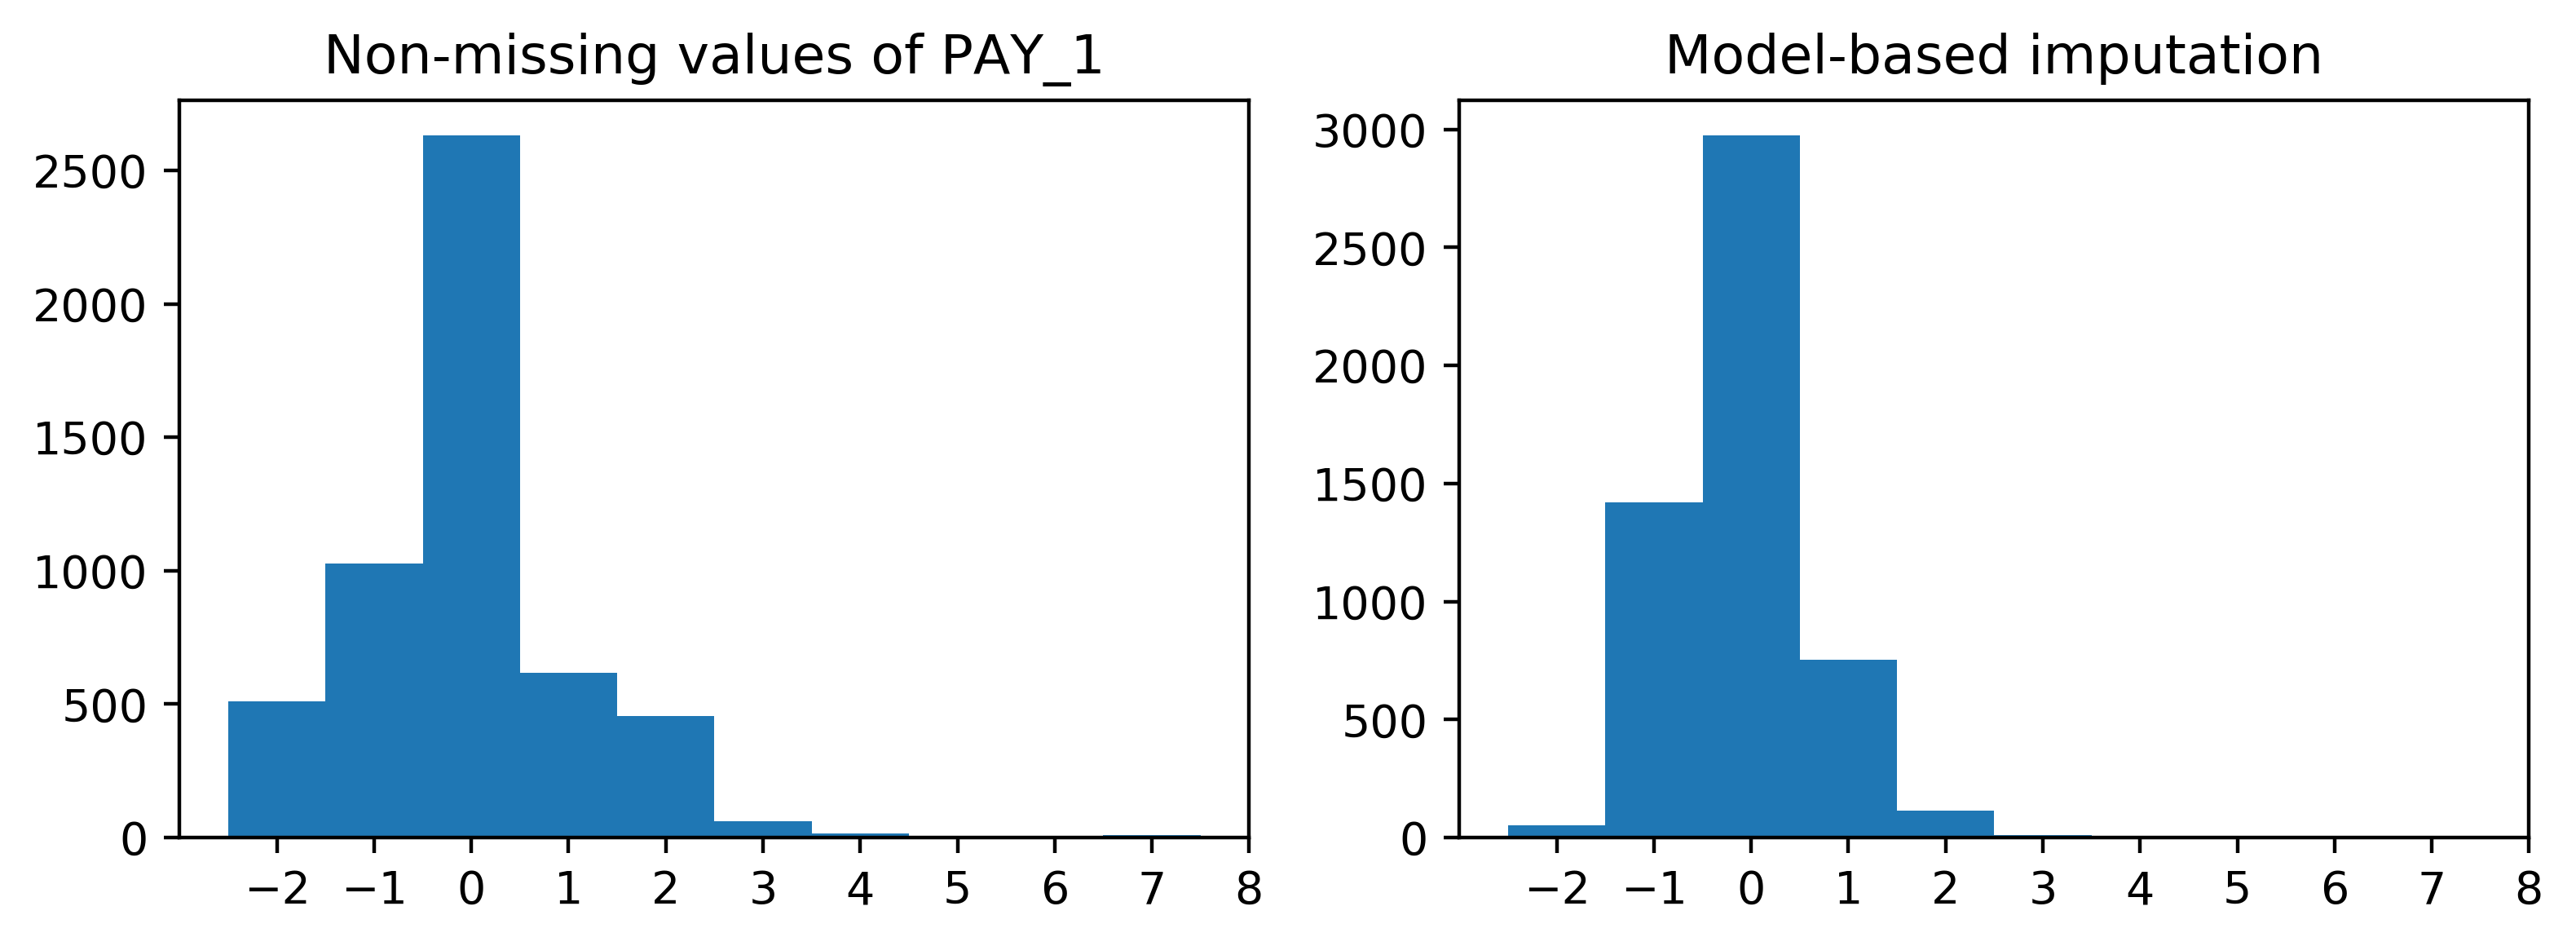

In [65]:
fig, axs = plt.subplots(1,2, figsize=(8,3))
axs[0].hist(y_impute_test, bins=bin_edges, align='left')
axs[0].set_xticks(bin_edges)
axs[0].set_title('Non-missing values of PAY_1')
axs[1].hist(y_impute_predict, bins=bin_edges, align='left')
axs[1].set_xticks(bin_edges)
axs[1].set_title('Model-based imputation')
plt.tight_layout()

In [66]:
X_impute_all = pay_1_df[features_for_imputation].values
y_impute_all = pay_1_df['PAY_1'].values
X_impute_all, y_impute_all

(array([[ 20000,      2,      1, ...,      0,      0,      0],
        [120000,      2,      2, ...,   1000,      0,   2000],
        [ 90000,      2,      2, ...,   1000,   1000,   5000],
        ...,
        [ 30000,      2,      2, ...,   4200,   2000,   3100],
        [ 80000,      3,      1, ...,   1926,  52964,   1804],
        [ 50000,      2,      1, ...,   1000,   1000,   1000]], dtype=int64),
 array([ 2, -1,  0, ...,  4,  1,  0], dtype=int64))

In [67]:
rf_impute = RandomForestClassifier(n_estimators=100, max_depth=12)
rf_impute

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [68]:
rf_impute

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [69]:
rf_impute.fit(X_impute_all, y_impute_all)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

##### Using the Imputation Model and Comparing it to Other Methods

In [70]:
df_fill_pay_1_model = df_missing_pay_1.copy()
df_fill_pay_1_model

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE          PAY_1  \
17     f0ba5e02-0c0f     320000    1          1         1   49  Not available   
28     aecb449b-a999      50000    2          3         1   47  Not available   
29     57ea9a1f-cdd5      50000    1          1         2   26  Not available   
54     781f3cc2-7ddc     150000    2          1         2   29  Not available   
60     5c00d7e6-a804     500000    2          3         1   28  Not available   
...              ...        ...  ...        ...       ...  ...            ...   
29949  4b490335-91ab     280000    1          1         1   39  Not available   
29956  b4a99d86-3bdd     150000    1          1         2   30  Not available   
29967  f411fbb3-adaf      50000    1          2         1   32  Not available   
29973  31c0c152-e5ac     230000    1          2         1   35  Not available   
29984  3aee2b22-6bd0      30000    1          2         2   38  Not available   

       PAY_2  PAY_3  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
17         0      0     -1  ...      70074       5856     195599     10358   
28        -1     -1     -1  ...       2040      30430        257      3415   
29         0      0      0  ...      17907      18375      11400      1500   
54         0      0      0  ...      26518      21042      16540      1600   
60         0      0      0  ...      14937      13827      15571      1516   
...      ...    ...    ...  ...        ...        ...        ...       ...   
29949      0      0      0  ...      40939      44290      70573      1652   
29956      0      0     -1  ...       1610       1180       2980      2000   
29967      0      0     -1  ...      50551      40590      39384      2686   
29973     -2     -2     -2  ...          0          0          0         0   
29984     -1     -2     -1  ...       1993       1907       3319       923   

       PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
17        10000     75940     20000    195599     50000   
28         3421      2044     30430       257         0   
29         1500      1000      1000      1600         0   
54         1718      1049      1500      2000      5000   
60         1300      1000      1000      2000      2000   
...         ...       ...       ...       ...       ...   
29949      2144      1666      5015     32013        12   
29956      2000      2000      1000      3000         0   
29967         0     50551         0      1600      1500   
29973         0         0         0         0         0   
29984      2977      1999      3057      3319      1000   

       default payment next month  
17                              0  
28                              0  
29                              0  
54                              0  
60                              1  
...                           ...  
29949                           0  
29956                           0  
29967                           0  
29973                           1  
29984                           0  

[3021 rows x 25 columns]

In [71]:
df_fill_pay_1_model['PAY_1'].head()

17    Not available
28    Not available
29    Not available
54    Not available
60    Not available
Name: PAY_1, dtype: object

In [72]:
df_fill_pay_1_model['PAY_1'] = rf_impute.predict(df_fill_pay_1_model[features_for_imputation].values)
df_fill_pay_1_model['PAY_1']

17       0
28      -1
29       0
54       0
60       0
        ..
29949    0
29956   -1
29967    0
29973    1
29984   -1
Name: PAY_1, Length: 3021, dtype: int64

In [73]:
df_fill_pay_1_model['PAY_1'].head()

17    0
28   -1
29    0
54    0
60    0
Name: PAY_1, dtype: int64

In [74]:
df_fill_pay_1_model['PAY_1'].value_counts().sort_index()

-2      30
-1     763
 0    1715
 1     438
 2      64
 3       7
 4       2
 6       1
 8       1
Name: PAY_1, dtype: int64

In [75]:
X_fill_pay_1_train, X_fill_pay_1_test, y_fill_pay_1_train, y_fill_pay_1_test = \
train_test_split(
    df_fill_pay_1_model[features_response[:-1]].values,
    df_fill_pay_1_model['default payment next month'].values,
test_size=0.2, random_state=24)

In [76]:
print(X_fill_pay_1_train.shape)
print(X_fill_pay_1_test.shape)
print(y_fill_pay_1_train.shape)
print(y_fill_pay_1_test.shape)

(2416, 17)
(605, 17)
(2416,)
(605,)


In [77]:
X_train_all = np.concatenate((X_train, X_fill_pay_1_train), axis=0)
y_train_all = np.concatenate((y_train, y_fill_pay_1_train), axis=0)
X_train_all, y_train_all

(array([[120000,      2,      2, ...,      0,   3107,   8542],
        [190000,      1,      1, ...,  10091,  20000,  10000],
        [420000,      2,      1, ...,   3034,   3012,   5012],
        ...,
        [320000,      1,      2, ...,      0,    673,  11288],
        [ 80000,      2,      1, ...,      0,   1500,    800],
        [230000,      2,      1, ...,      0,      0,      0]], dtype=int64),
 array([1, 1, 0, ..., 0, 0, 0], dtype=int64))

In [78]:
print(X_train_all.shape)
print(y_train_all.shape)

(23747, 17)
(23747,)


In [79]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=4, verbose=1,
                       warm_start=False)

In [80]:
imputation_compare_cv = cross_validate(rf, X_train_all, y_train_all, scoring='roc_auc',
                                       cv=k_folds, n_jobs=-1, verbose=1,
                                       return_train_score=True, return_estimator=True,
                                       error_score='raise-deprecating')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   14.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   14.7s finished


In [81]:
imputation_compare_cv['test_score']
# array([0.76890992, 0.77309591, 0.77166336, 0.77703366])

array([0.76890992, 0.77309591, 0.77166336, 0.77703366])

In [82]:
np.mean(imputation_compare_cv['test_score'])
# 0.7726757126815554

0.7726757126815554

In [83]:
np.std(imputation_compare_cv['test_score'])
# 0.002931480680760725

0.002931480680760725

Reassign values using mode imputation

In [84]:
df_fill_pay_1_model['PAY_1'] = np.zeros_like(df_fill_pay_1_model['PAY_1'].values)
df_fill_pay_1_model['PAY_1']

17       0
28       0
29       0
54       0
60       0
        ..
29949    0
29956    0
29967    0
29973    0
29984    0
Name: PAY_1, Length: 3021, dtype: int64

In [85]:
df_fill_pay_1_model['PAY_1'].unique()

array([0], dtype=int64)

In [86]:
X_fill_pay_1_train, X_fill_pay_1_test, y_fill_pay_1_train, y_fill_pay_1_test = \
train_test_split(
    df_fill_pay_1_model[features_response[:-1]].values,
    df_fill_pay_1_model['default payment next month'].values,
test_size=0.2, random_state=24)

In [87]:
X_train_all = np.concatenate((X_train, X_fill_pay_1_train), axis=0)
X_test_all = np.concatenate((X_test, X_fill_pay_1_test), axis=0)
y_train_all = np.concatenate((y_train, y_fill_pay_1_train), axis=0)
y_test_all = np.concatenate((y_test, y_fill_pay_1_test), axis=0)

In [88]:
print(X_train_all.shape)
print(X_test_all.shape)
print(y_train_all.shape)
print(y_test_all.shape)

(23747, 17)
(5938, 17)
(23747,)
(5938,)


In [89]:
imputation_compare_cv = cross_validate(rf, X_train_all, y_train_all, scoring='roc_auc',
                                       cv=k_folds, n_jobs=-1, verbose=1,
                                       return_train_score=True, return_estimator=True,
                                       error_score='raise-deprecating')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   14.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   14.7s finished


In [90]:
np.mean(imputation_compare_cv['test_score'])

0.772866246168149

##### Confirming Model Performance on the Unseen Test Set

In [91]:
rf.fit(X_train_all, y_train_all)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   16.0s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=4, verbose=1,
                       warm_start=False)

In [92]:
y_test_all_predict_proba = rf.predict_proba(X_test_all)
y_test_all_predict_proba

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished


array([[0.49253653, 0.50746347],
       [0.50985261, 0.49014739],
       [0.91548215, 0.08451785],
       ...,
       [0.89237712, 0.10762288],
       [0.89208136, 0.10791864],
       [0.65478841, 0.34521159]])

In [93]:
from sklearn.metrics import roc_auc_score

In [94]:
roc_auc_score(y_test_all, y_test_all_predict_proba[:,1])
# 0.7696243835824927

0.7696243835824927

##### Characterizing Costs and Savings

In [95]:
thresholds = np.linspace(0, 1, 101)
thresholds

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

Use mean bill amount to estimate savings per prevented default

In [96]:
df[features_response[:-1]].columns[5]

'BILL_AMT1'

In [97]:
savings_per_default = np.mean(X_test_all[:, 5])
savings_per_default
# 51601.7433479286

51601.7433479286

In [98]:
cost_per_counseling = 7500

In [99]:
effectiveness = 0.70

In [100]:
n_pos_pred = np.empty_like(thresholds)
cost_of_all_counselings = np.empty_like(thresholds)
n_true_pos = np.empty_like(thresholds)
savings_of_all_counselings = np.empty_like(thresholds)

In [101]:
counter = 0
for threshold in thresholds:
    pos_pred = y_test_all_predict_proba[:,1]>threshold
    n_pos_pred[counter] = sum(pos_pred)
    cost_of_all_counselings[counter] = n_pos_pred[counter] * cost_per_counseling
    true_pos = pos_pred & y_test_all.astype(bool)
    n_true_pos[counter] = sum(true_pos)
    savings_of_all_counselings[counter] = n_true_pos[counter] * savings_per_default * effectiveness
    
    counter += 1

In [102]:
net_savings = savings_of_all_counselings - cost_of_all_counselings
net_savings

array([ 1880768.14146177,  1880768.14146177,  1880768.14146177,
        1880768.14146177,  1880768.14146177,  1994646.92111822,
        2888525.70077467,  3978177.15836982,  5656358.85321657,
        7257722.24291007,  8978919.05638262,  9769676.34435837,
       10775009.49680027, 11227660.68305827, 12066008.95412597,
       12813145.02175817, 13576659.86904681, 14302674.71633547,
       14686447.12293702, 15203068.07194342, 15446325.35991916,
       15373976.54617716, 15364218.71552711, 15344203.32556416,
       15434536.47800606, 15254869.63044796, 14894596.68117211,
       14576566.17258336, 14477247.86743011, 14099217.35884136,
       13906535.39265746, 13518247.32475581, 13476171.46028966,
       12993140.95170091, 12878049.96860896, 12670974.10414281,
       12339155.79898956, 11957595.05314921, 11704140.40902661,
       11474564.54456046, 11186367.45975076, 10909806.71391041,
       10740836.95116201, 10409018.64600876, 10048579.12051195,
        9987973.01879421,  9889866.91707

In [103]:
# plt.plot(thresholds, cost_of_all_counselings)

In [104]:
# plt.plot(thresholds, savings_of_all_counselings)

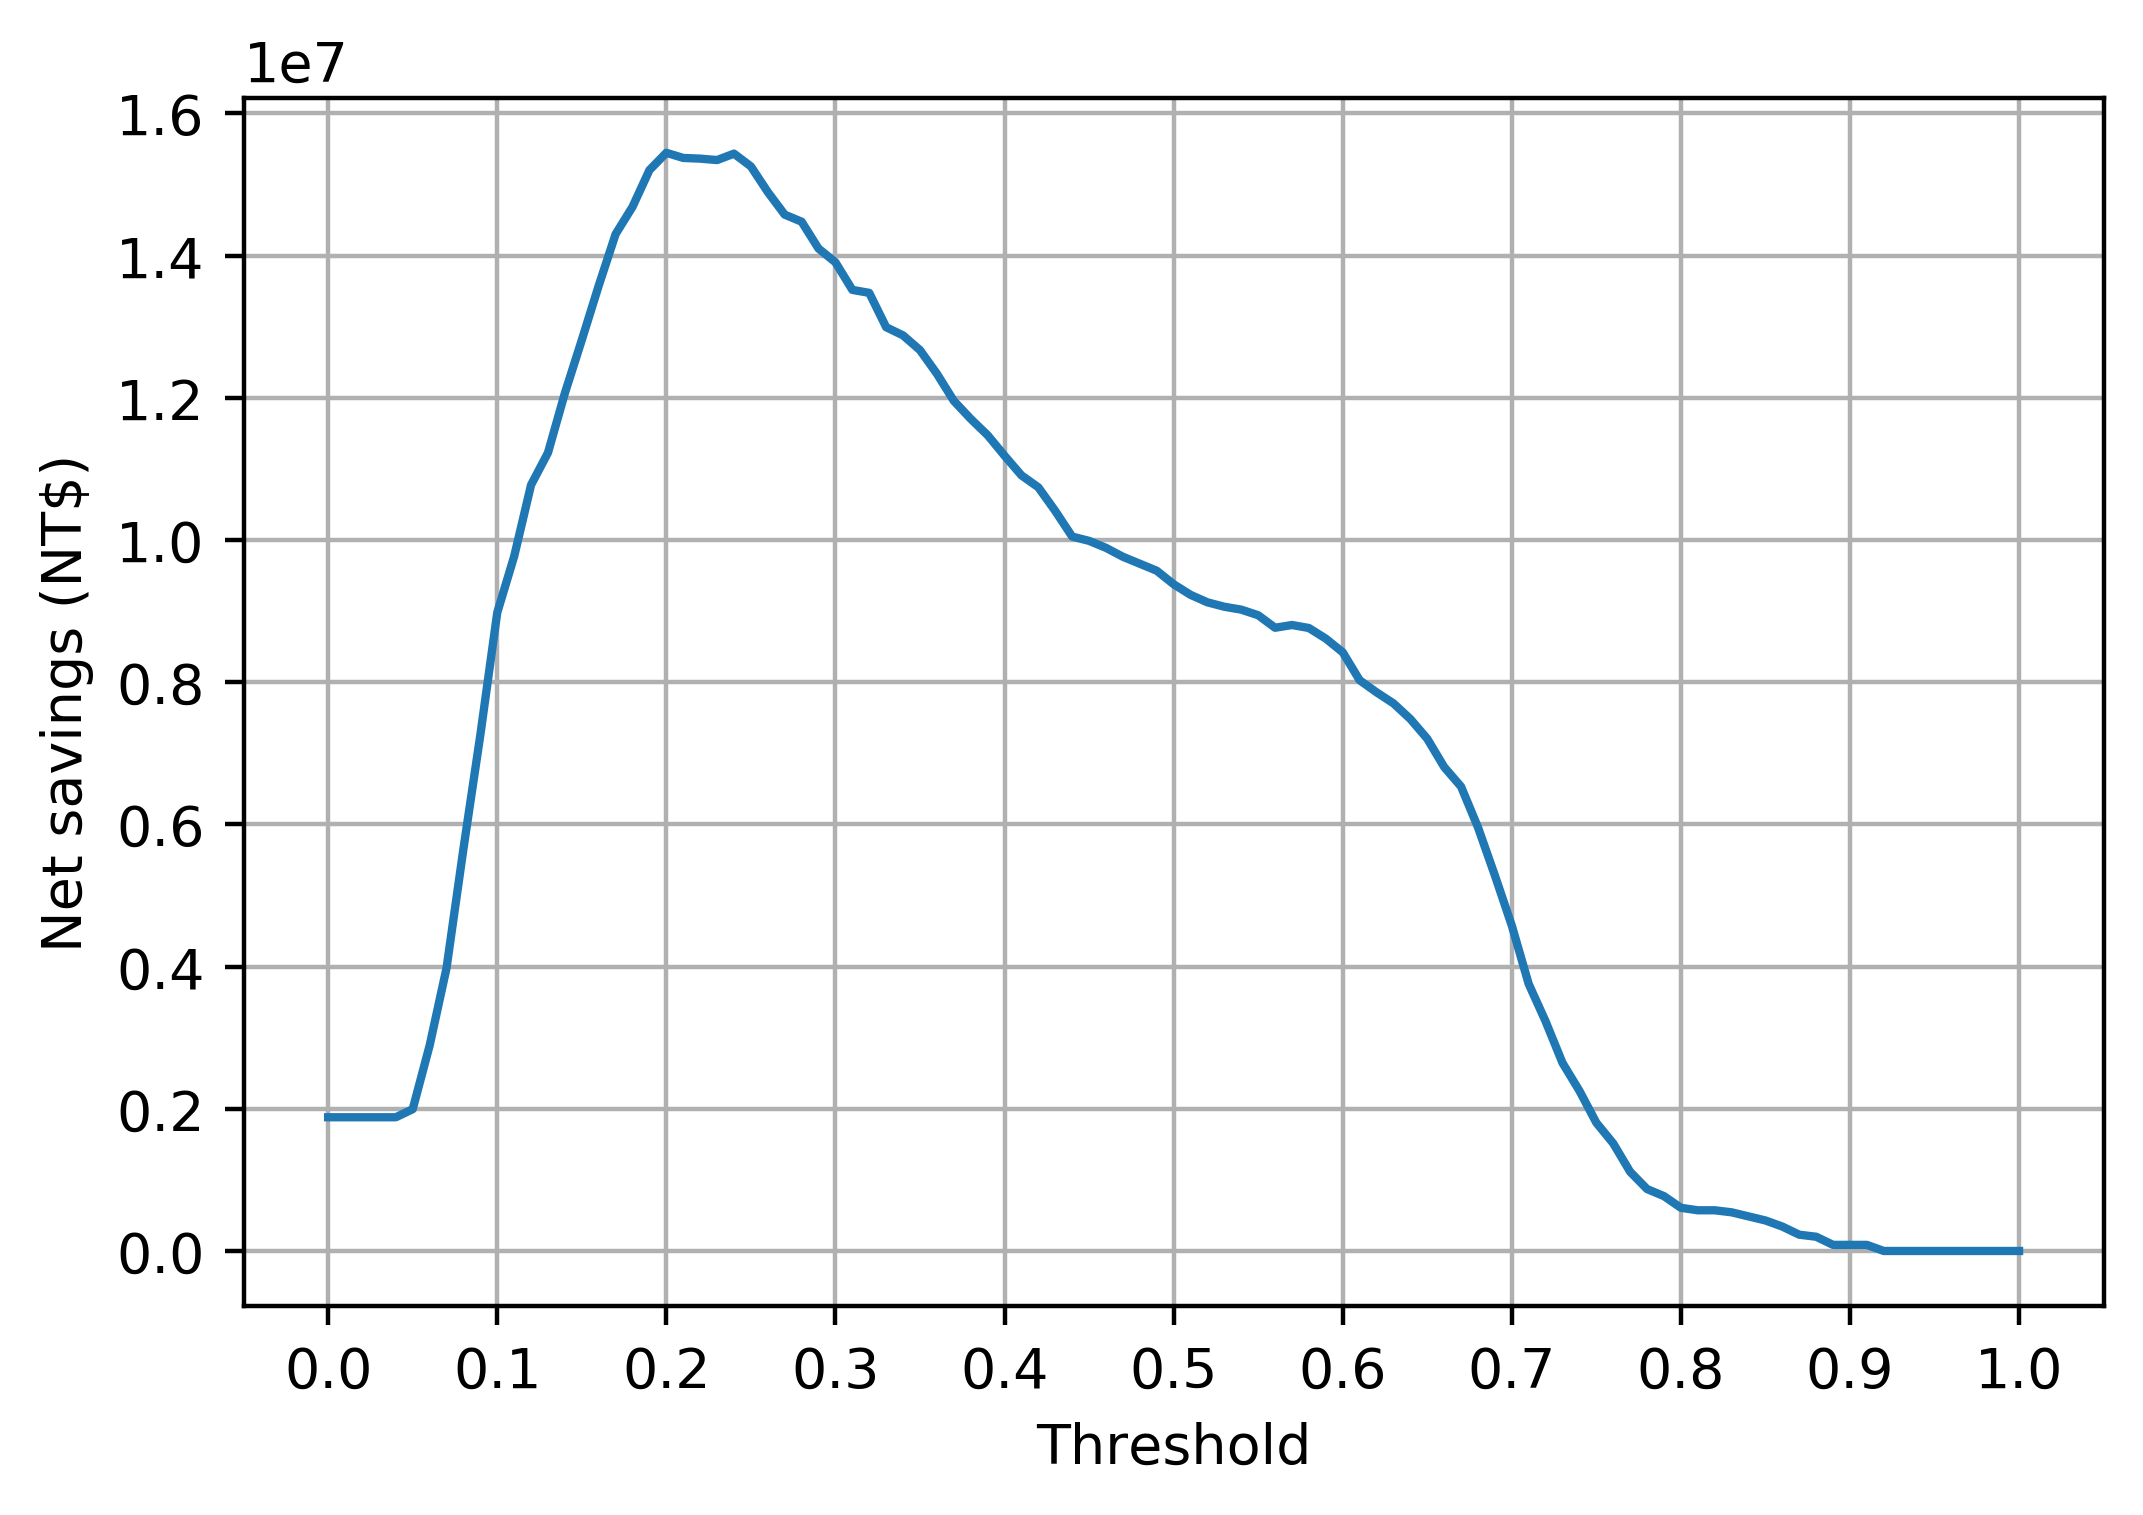

In [105]:
mpl.rcParams['figure.dpi'] = 400
plt.plot(thresholds, net_savings)
plt.xlabel('Threshold')
plt.ylabel('Net savings (NT$)')
plt.xticks(np.linspace(0,1,11))
plt.grid(True)

In [106]:
max_savings_ix = np.argmax(net_savings)
max_savings_ix

20

What is the threshold at which maximum savings is achieved?

In [107]:
thresholds[max_savings_ix]
# 0.2

0.2

What is the maximum possible savings?

In [108]:
net_savings[max_savings_ix]
# 15446325.35991916

15446325.35991916

## Challenge: Deriving Financial Insights

    Everything that is needed prior to this challenge has been included in the notebook above. You should run all the necessary portions of the provided code before beginning these tasks.

In [109]:
# This will autosave your notebook every ten seconds
%autosave 10

Autosaving every 10 seconds


**Using the testing set, calculate the cost of all defaults if there were no counseling program and output your result.**

In [110]:
cost_of_defaults = sum(y_test_all) * savings_per_default
cost_of_defaults

66308240.202088244

_______________________________________________________________________________________________
**Next, calculate by what percent can the cost of defaults be decreased by the counseling program and output you result.**

In [111]:
net_savings[max_savings_ix]/cost_of_defaults

0.2329472975431598

_______________________________________________________________________________________________
**Then, calculate the net savings per account at the optimal threshold and output your result.**

In [112]:
net_savings[max_savings_ix]/len(y_test_all)

2601.2673223171373

_______________________________________________________________________________________________
**Now, plot the net savings per account against the cost of counseling per account for each threshold.**

Text(0, 0.5, 'Net savings per account (NT$)')

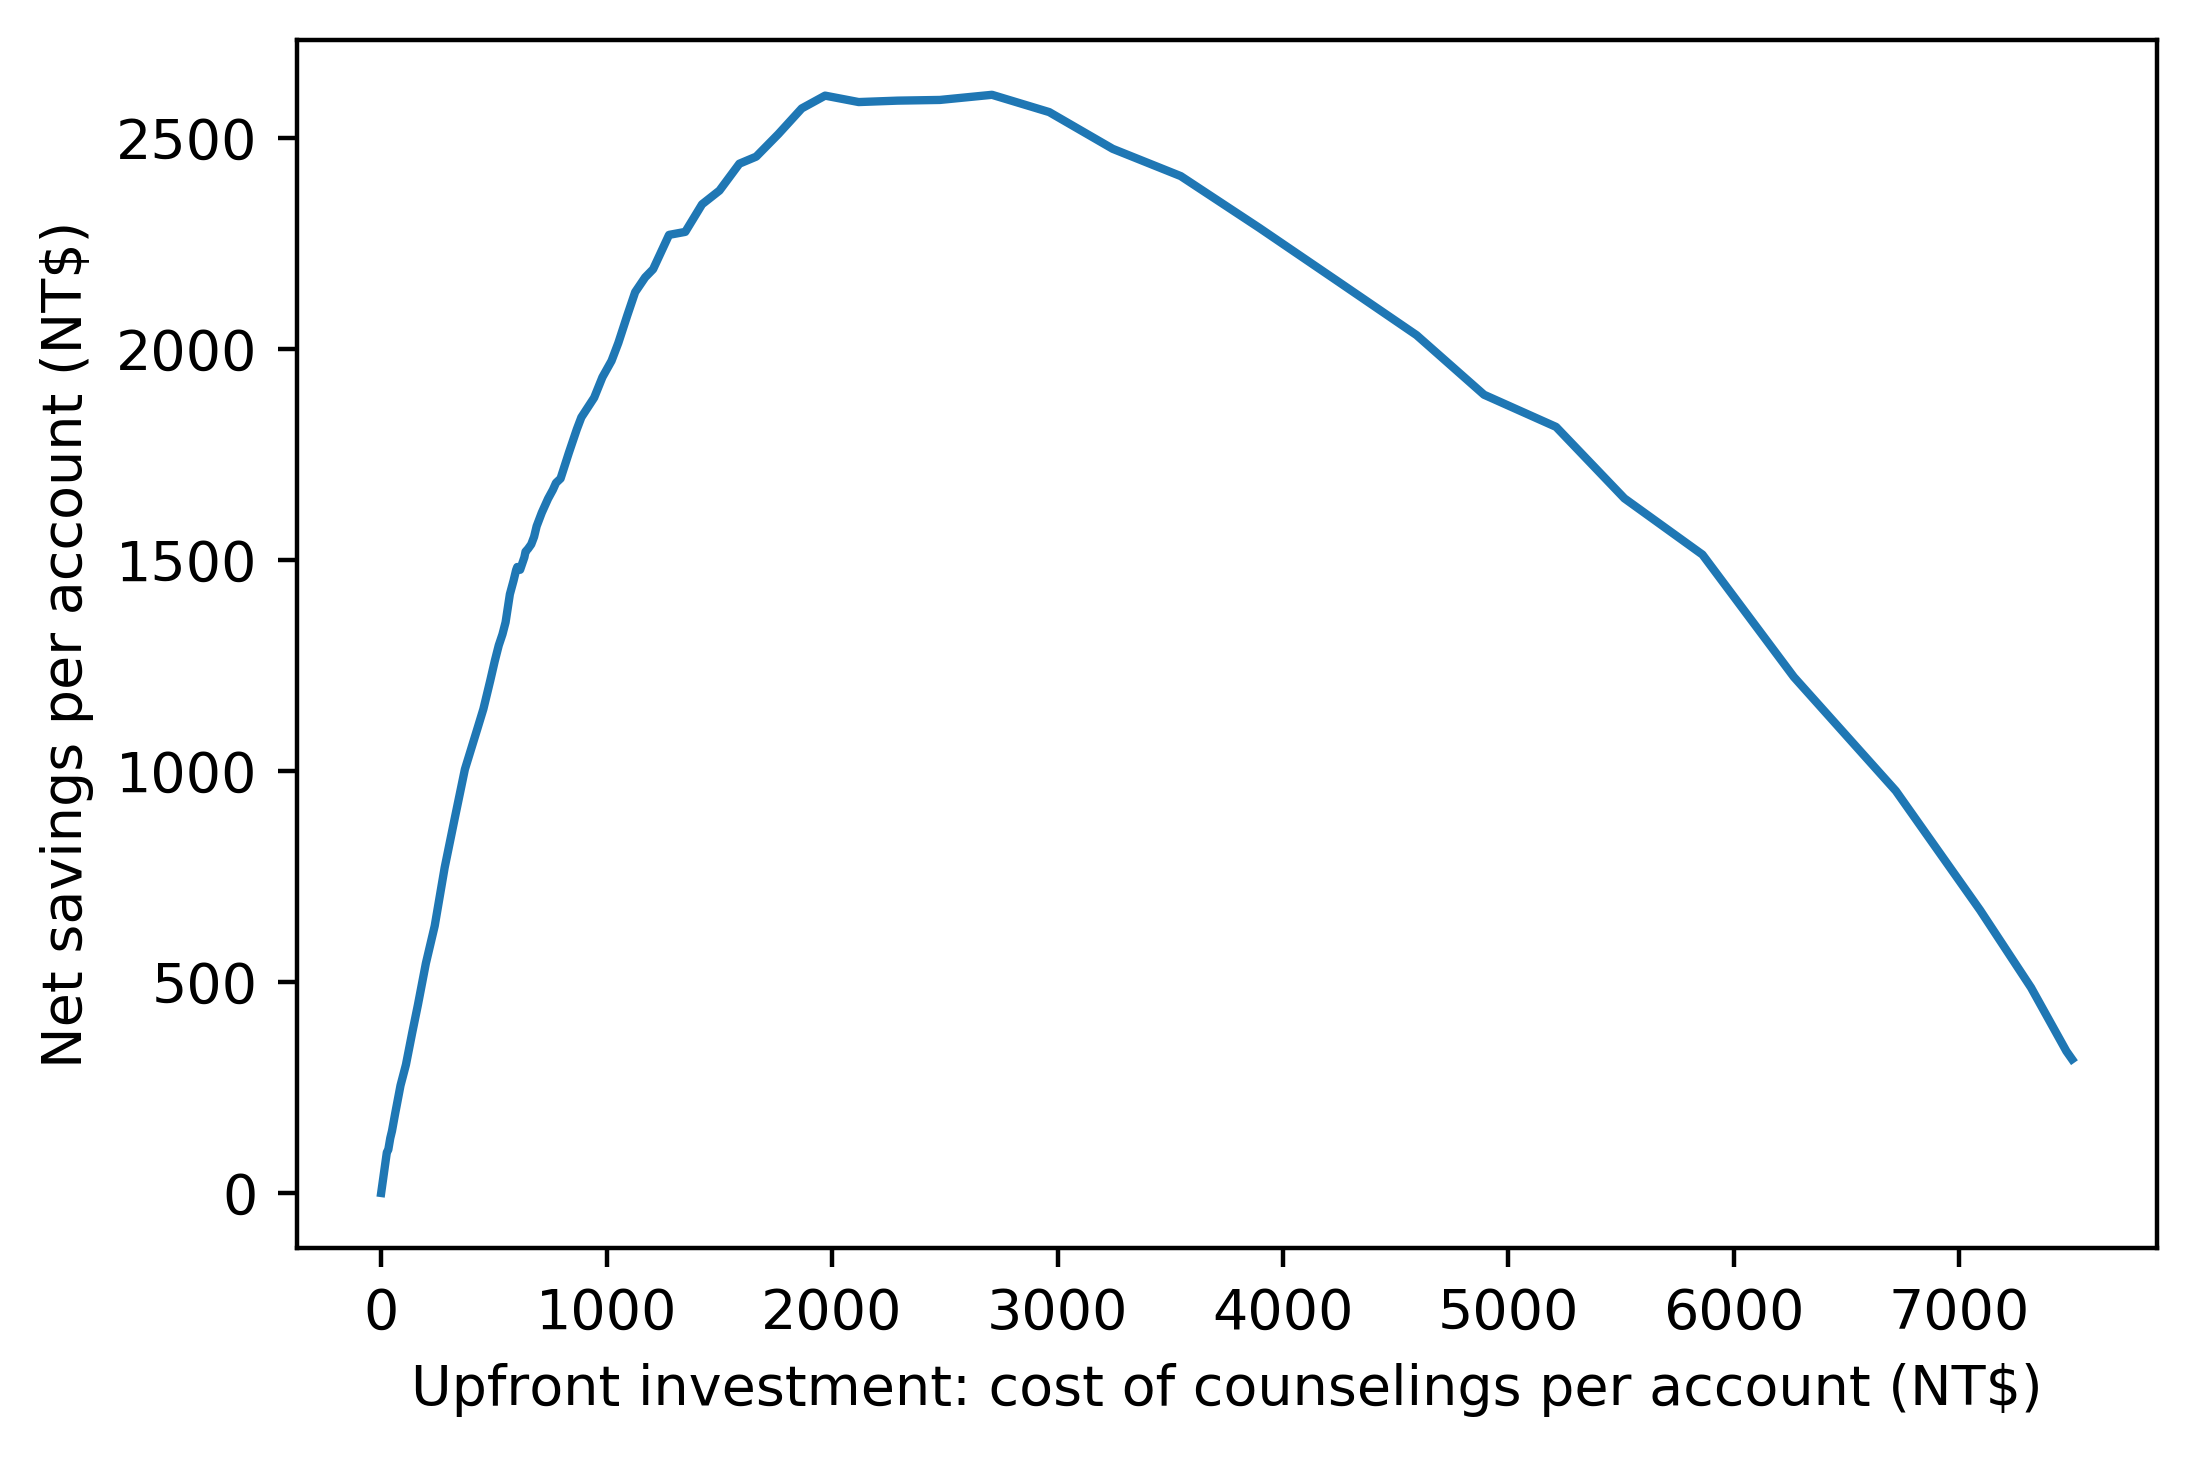

In [113]:

plt.plot(cost_of_all_counselings/len(y_test_all), net_savings/len(y_test_all))
plt.xlabel('Upfront investment: cost of counselings per account (NT$)')
plt.ylabel('Net savings per account (NT$)')

_______________________________________________________________________________________________
**Next, plot the fraction of accounts predicted as positive (this is called the "flag rate") at each threshold.**

Text(0.5, 0, 'Threshold')

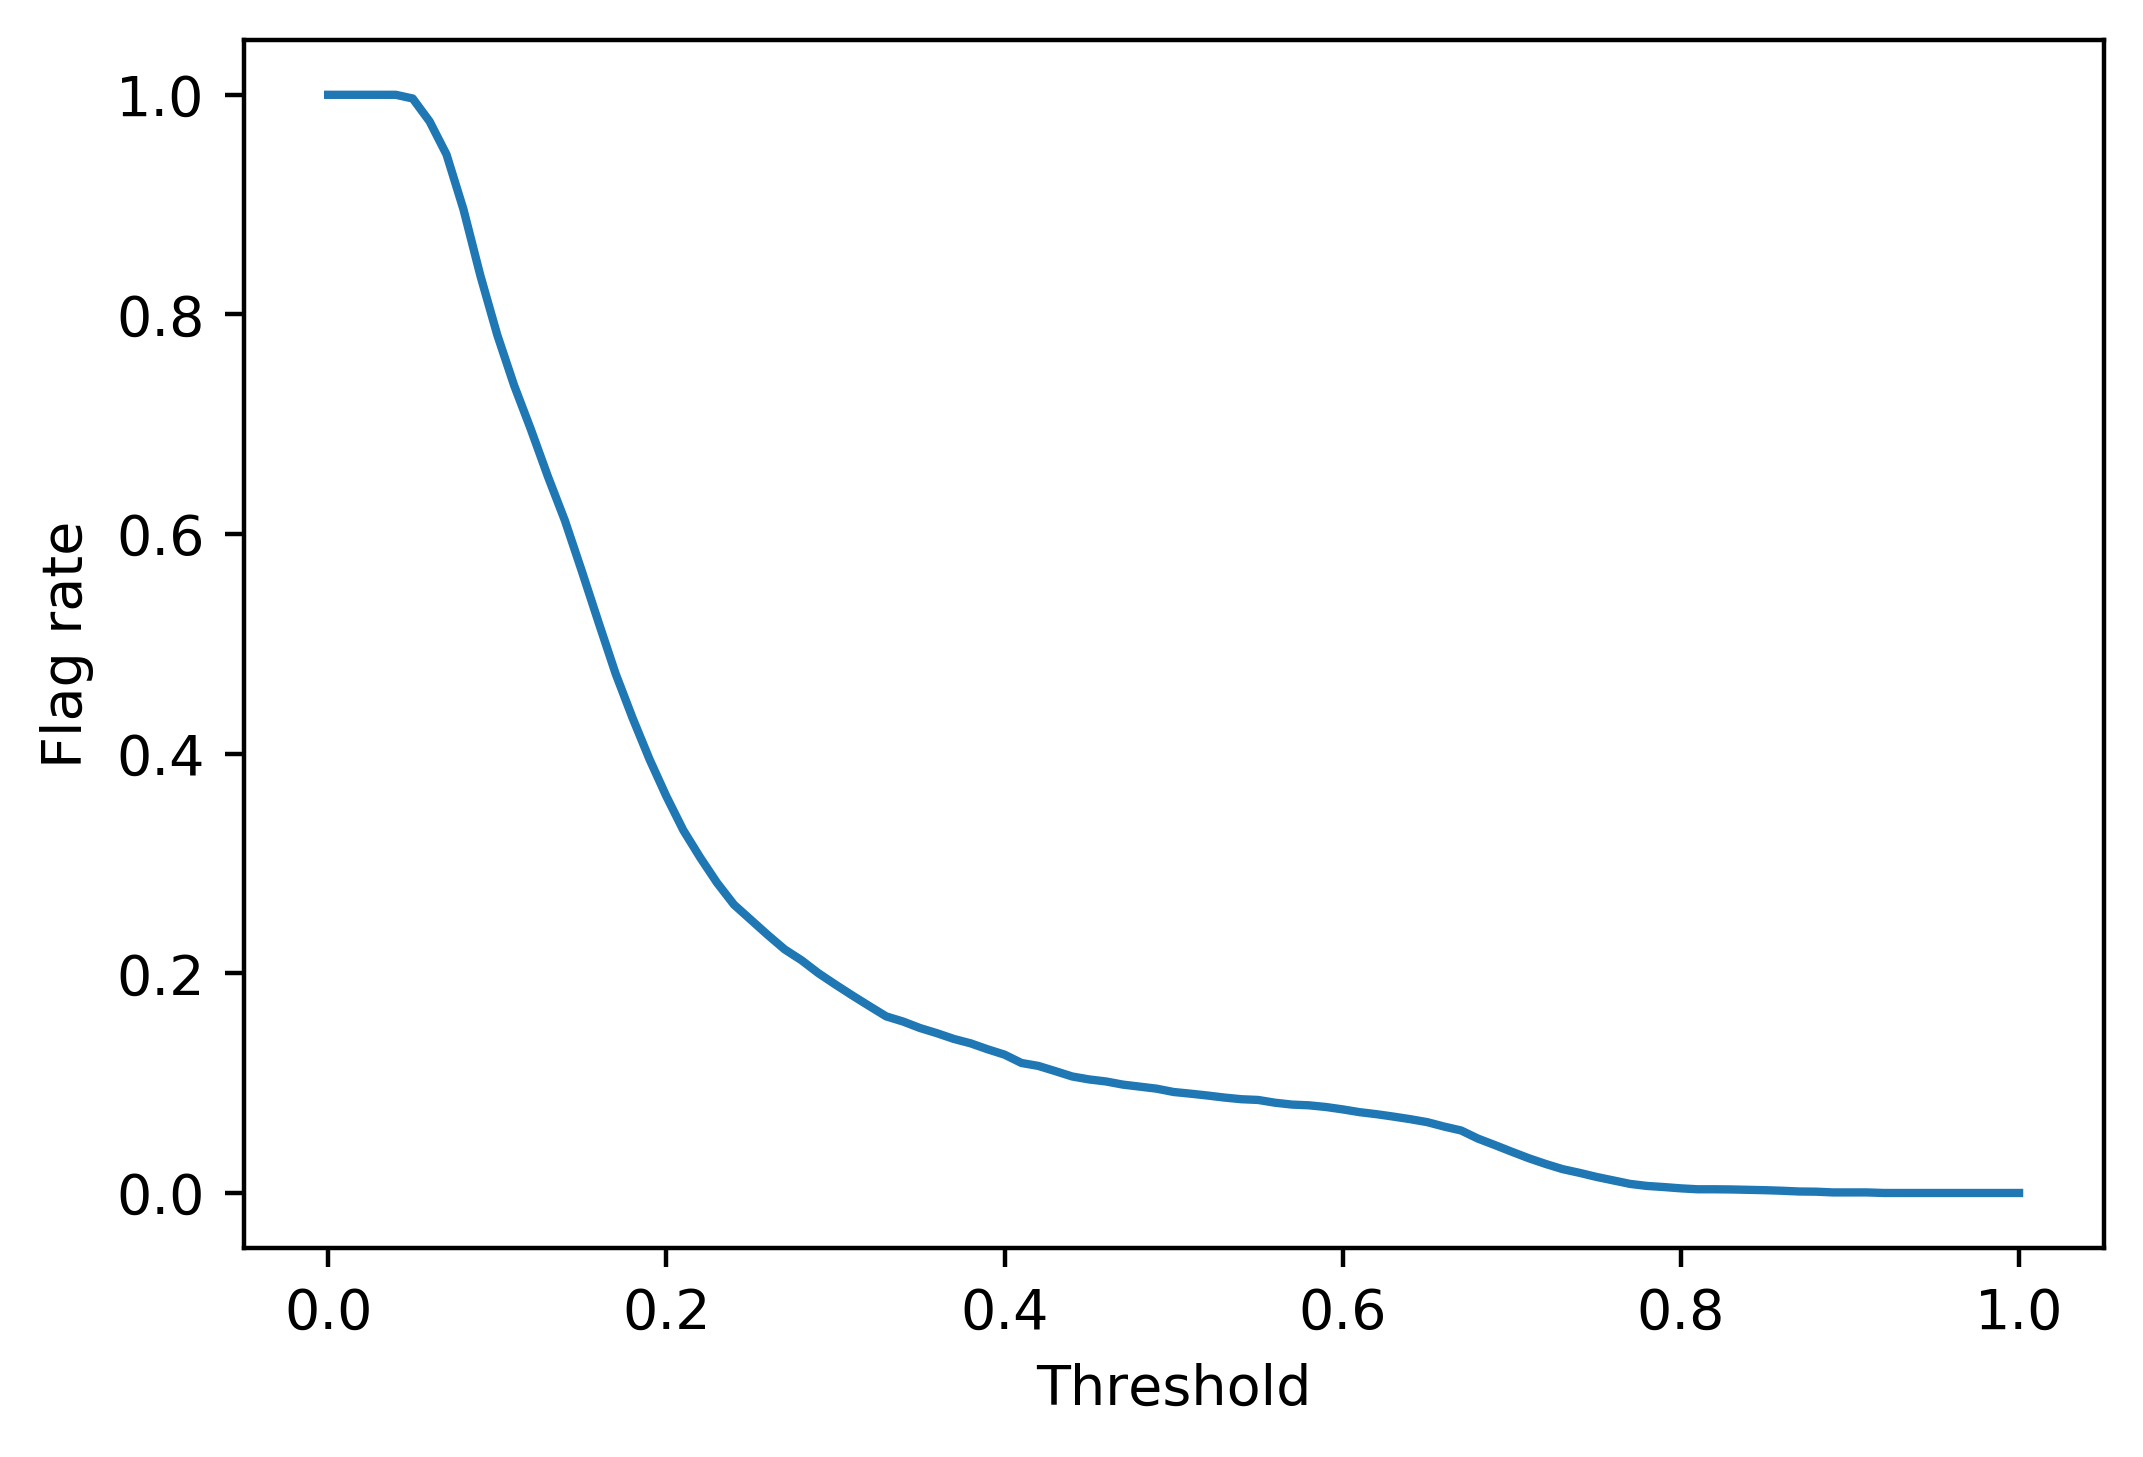

In [114]:
plt.plot(thresholds, n_pos_pred/len(y_test_all))
plt.ylabel('Flag rate')
plt.xlabel('Threshold')

_______________________________________________________________________________________________
**Next, plot a precision-recall curve for the testing data.**

In [115]:
plt.plot(n_true_pos/sum(y_test_all), np.divide(n_true_pos, n_pos_pred))
plt.xlabel('Recall')
plt.ylabel('Precision')

C:\Users\Mrinal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Precision')

_______________________________________________________________________________________________
**Finally, plot precision and recall separately on the y-axis against threshold on the x-axis.**

C:\Users\Mrinal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


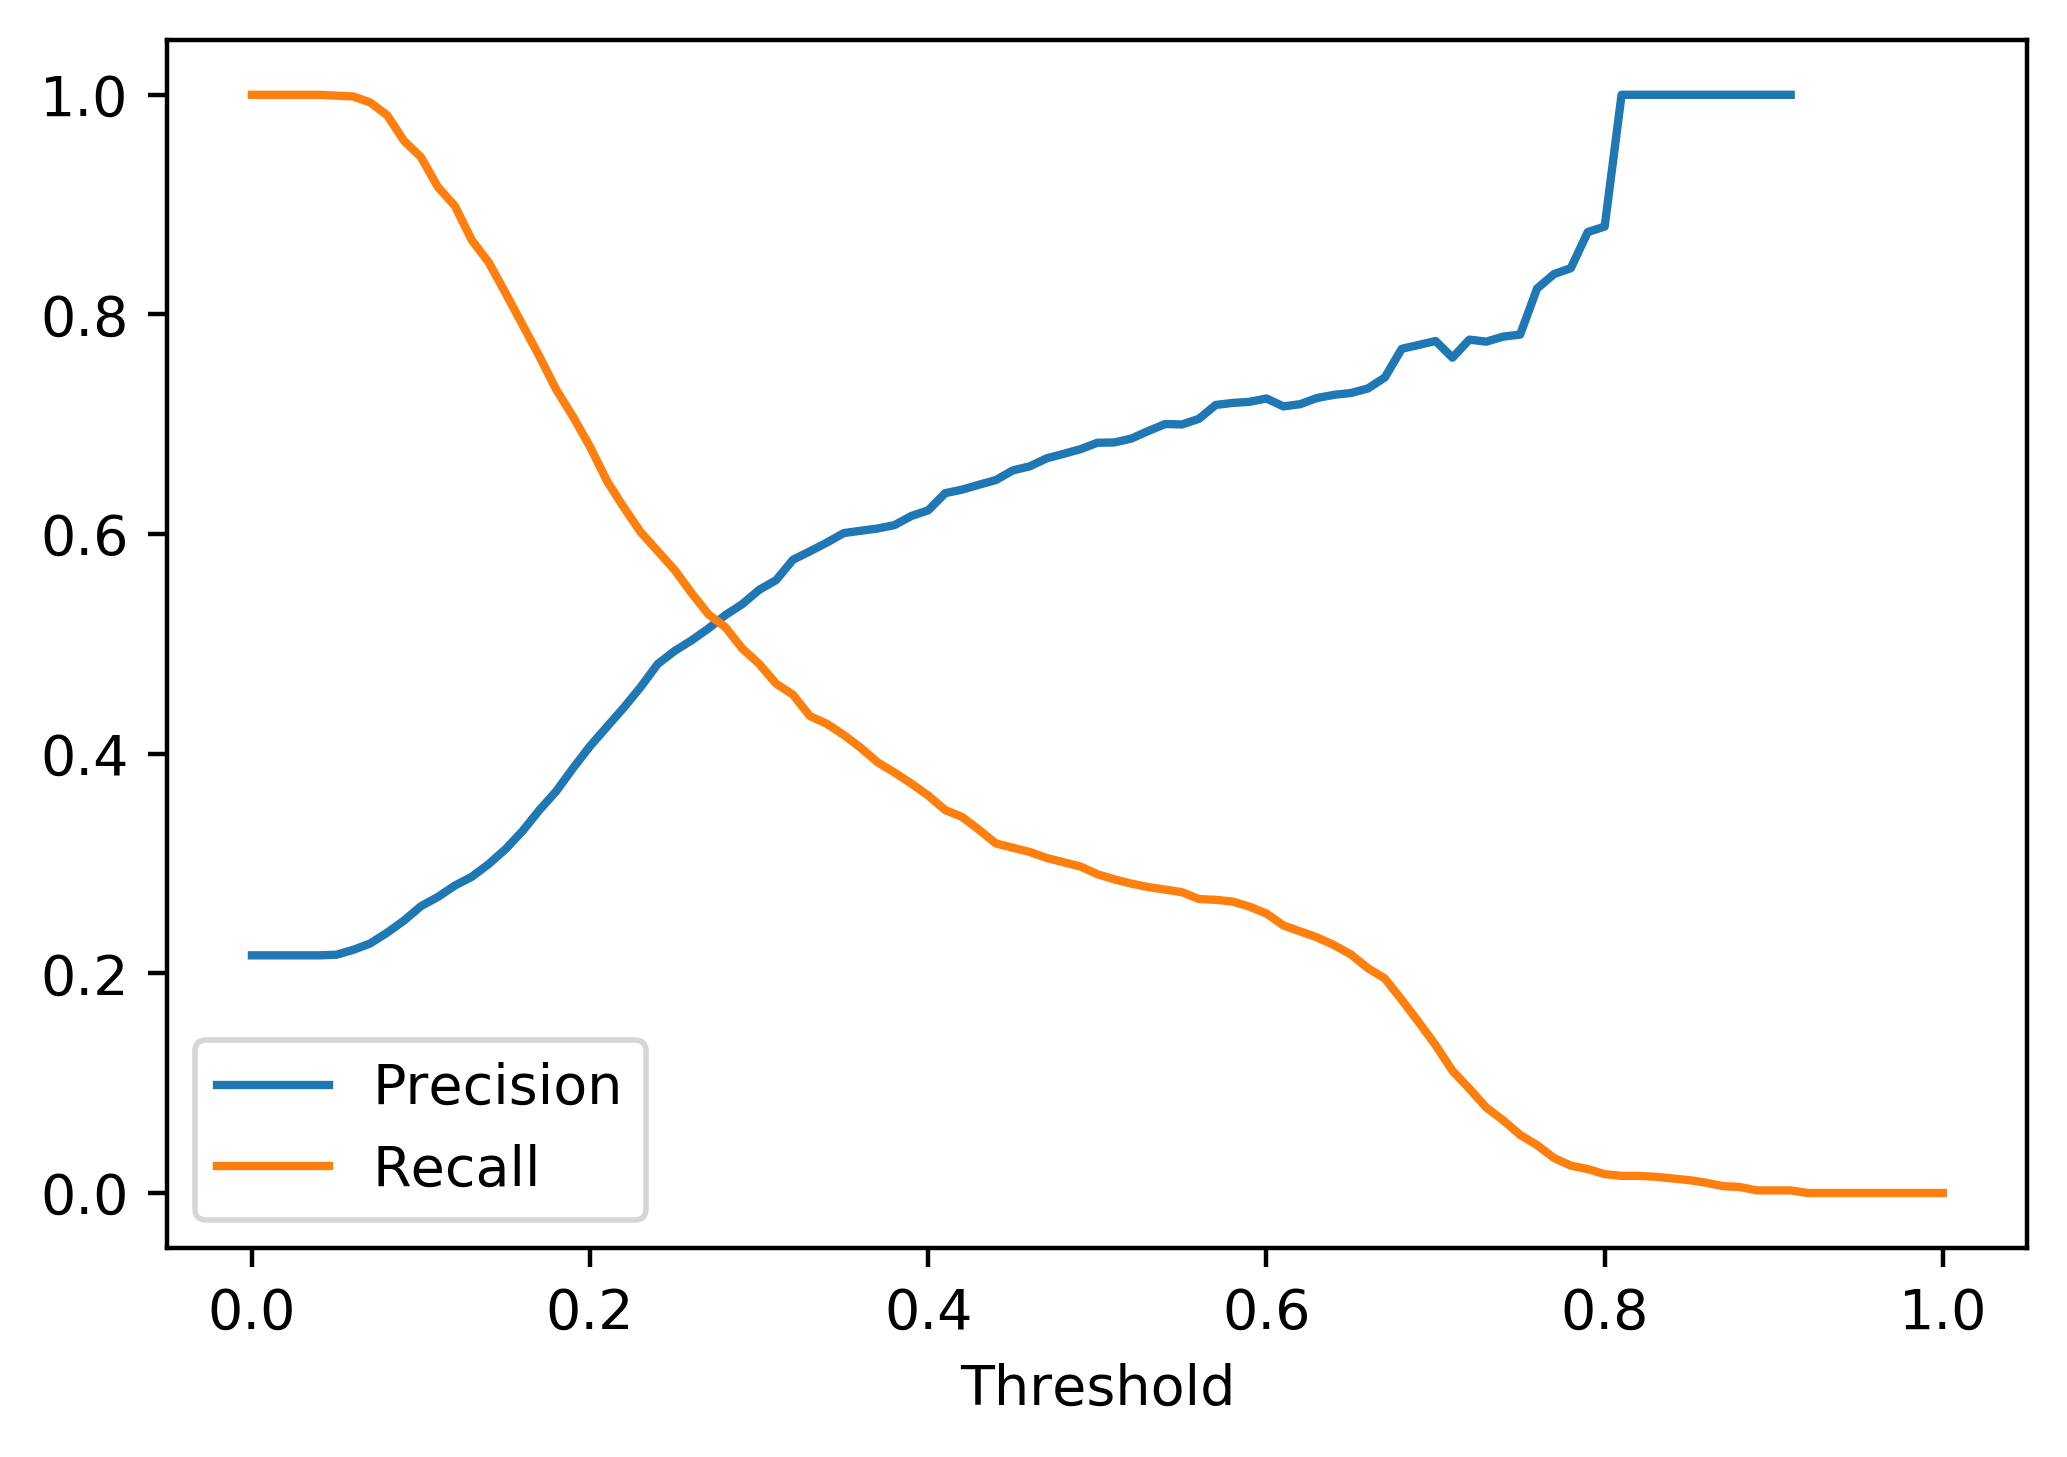

In [116]:
plt.plot(thresholds, np.divide(n_true_pos, n_pos_pred), label='Precision')
plt.plot(thresholds, n_true_pos/sum(y_test_all), label='Recall')
plt.xlabel('Threshold')
plt.legend()